In [1]:
from impact_score.json_analyser.pool.analyser_pool import analyser_pool
from impact_consumer import export_impact, export_probability_points, generate_probability_dataframe
import pandas as pd
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib import ticker
import time
from impact_score.impact_consumer.impact_consumer import merge_impacts

In [17]:
from impact_score.impact.graph_plot import GraphPlotter

match_id = 76213
gp = GraphPlotter()
gp.set_match(match_id)

Round 1 selected
Round 2 selected
Round 3 selected
Round 4 selected
Round 5 selected
Round 6 selected
Round 7 selected
Round 8 selected
Round 9 selected
Round 10 selected
Round 11 selected
Round 12 selected
Round 13 selected
Round 14 selected
Round 15 selected
Round 16 selected
Round 17 selected
Round 18 selected
Round 19 selected
Round 20 selected
Round 21 selected
Round 22 selected
Round 23 selected
Round 24 selected


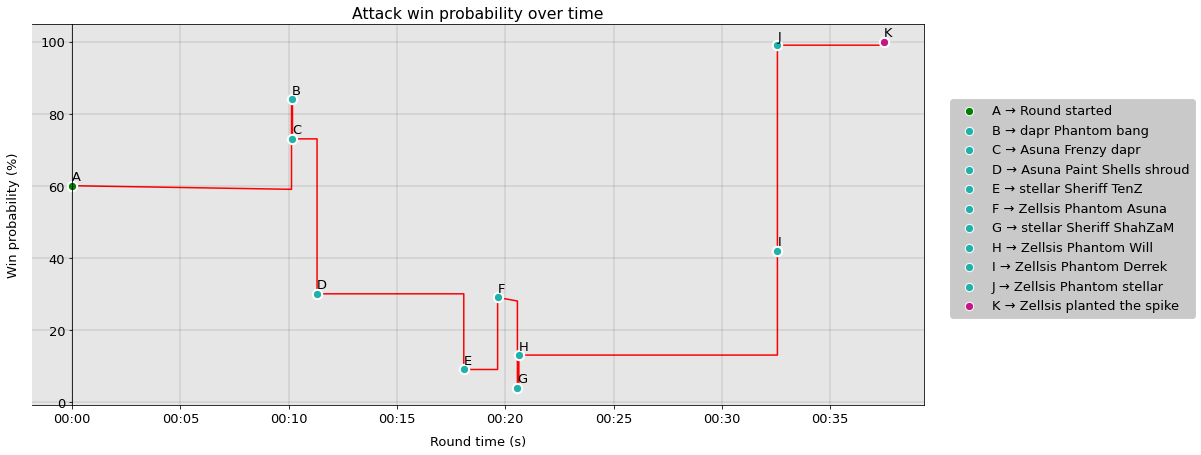

In [18]:
gp.plot_round(round_number=22, side="atk")

In [19]:
from impact_score.impact.match_analysis import RoundReplay

rr = RoundReplay()
rr.set_match(match_id)
rr.choose_round(22)
prob = rr.get_round_probability(side="atk", add_events=True)
prob

Round 22 selected


,Round,EventID,EventType,Probability_before_event,Probability_after_event,Impact,Killer,KillerAgent,Weapon,Ability,Victim,VictimAgent
189,22,0,start,0.595131,0.595131,0.000000,0,0,0,0,0,0
190,22,9709798,kill,0.590364,0.841254,0.250890,dapr,Fade,Phantom,0,bang,Omen
191,22,9709794,kill,0.841254,0.728474,0.112781,Asuna,Raze,Frenzy,0,dapr,Fade
192,22,9709795,kill,0.728474,0.300510,0.427963,Asuna,Raze,0,Paint Shells,shroud,Omen
193,22,9709796,kill,0.300510,0.093794,0.206717,stellar,Sage,Sheriff,0,TenZ,Chamber
194,22,9709790,kill,0.093794,0.290404,0.196611,Zellsis,KAY/O,Phantom,0,Asuna,Raze
195,22,9709797,kill,0.281473,0.038165,0.243308,stellar,Sage,Sheriff,0,ShahZaM,Breach
196,22,9709791,kill,0.038165,0.132961,0.094796,Zellsis,KAY/O,Phantom,0,Will,Chamber
197,22,9709793,kill,0.132505,0.417024,0.284519,Zellsis,KAY/O,Phantom,0,Derrek,Fade
198,22,9709792,kill,0.417024,0.988378,0.571354,Zellsis,KAY/O,Phantom,0,stellar,Sage
